## Ocean stratification

### loading the modules

In [1]:
%reload_ext autoreload
%autoreload 2

In [5]:
from aqua.diagnostics.ocean_stratification import Stratification
from aqua.diagnostics.ocean_stratification import PlotStratification


### Initalizing the function

In [11]:
strat = Stratification(catalog='mn5-phase2', model='IFS-NEMO', exp='control-1990-freeze', source='lra-r100-monthly',
                startdate="01-01-1990", enddate="31-12-1990",
          loglevel='INFO')

In [12]:
strat.run(
    # dim_mean=["lat","lon"],
    outputdir= ".",
    var=['thetao', 'so'],
    region="ls",
    mld = True,  # Set to True to compute MLD, False to skip MLD computation
    climatology = "January"
    )

2025-10-01 10:55:08 :: Stratification :: INFO     -> Starting stratification diagnostic run.


2025-10-01 10:55:08 :: ConfigPath :: INFO     -> IFS-NEMO_control-1990-freeze_lra-r100-monthly triplet found in in mn5-phase2!
2025-10-01 10:55:09 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-10-01 10:55:09 :: Fixer :: INFO     -> No fixer_name found, only convention will be applied
2025-10-01 10:55:09 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-10-01 10:55:09 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-10-01 10:55:09 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-10-01 10:56:54 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-10-01 10:56:54 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-10-01 10:56:54 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-10-01 10:56:54 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-10-01 10:56:54 :: Regridder :: INFO

### Plotting the data

In [13]:
strat.data.mld

<xarray.DataArray 'mld' (lat: 13, lon: 17)> Size: 2kB
array([[          nan,           nan,           nan,           nan,
          13.67052878,   14.77901321,   19.00794117,   49.00673464,
          54.85166114,  137.42115469,  139.03828494,  124.4224373 ,
         119.01809035,  110.23504068,  107.7559383 ,  107.76990502,
         113.10710978],
       [          nan,           nan,   10.66506891,   11.47576211,
          14.46122974,   17.48714925,   21.85724716,   27.87673385,
          72.9596696 ,  330.7307168 ,  131.3832292 ,  149.49477528,
         152.34128713,  123.8257206 ,  110.57727366,  110.1416043 ,
         120.53742429],
       [          nan,   35.74020386,   11.15878387,   13.80079432,
          15.50611185,   19.45747445,   18.43801217,   40.86620506,
         599.03445985,  189.70712987,  139.15554793,  146.74004358,
         152.78866599,  132.99000661,  124.91911993,  126.20128131,
         118.83164633],
       [  26.56088276,   10.97166406,   15.9800044 ,   14.86502569,
          16.78536428,   28.84769952,   82.59300315,  645.48063929,
         298.9867596 ,  159.47016768,  129.39593397,  138.09556185,
         153.12552826,  139.58174272,  131.39292543,  115.64985916,
         117.48580642],
...
       [  33.18154123,  414.990904  ,  199.87266506,  158.9644843 ,
         117.40591184,   94.23061791,   68.55412266,   75.3513381 ,
          75.03982286,   50.54243495,   57.38869561,   69.34394809,
          87.01436495,   11.77367973,           nan,           nan,
                  nan],
       [  32.3724507 ,   95.7633029 ,  107.94910065,  113.81696493,
         101.4321948 ,   74.63502802,   53.52667444,   45.13551191,
          42.68130582,   33.91622724,   33.12794046,           nan,
                  nan,           nan,           nan,           nan,
                  nan],
       [  18.03911866,   33.16122392,   88.10087393,   89.77649893,
          74.19743857,   63.40704597,   63.11173834,   38.12109186,
          61.24878084,   39.72300397,   30.87456131,           nan,
                  nan,           nan,           nan,           nan,
                  nan],
       [  19.25809399,   19.23164505,   28.03571514,   71.36071705,
          96.4556909 ,  101.53294513,   99.80759487,  137.74246757,
         142.6755834 ,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan]])
Coordinates:
  * lat      (lat) float64 104B 52.5 53.5 54.5 55.5 56.5 ... 61.5 62.5 63.5 64.5
  * lon      (lon) float64 136B 300.0 301.0 302.0 303.0 ... 314.0 315.0 316.0
    time     <U9 36B 'January'
Attributes:
    standard_name:  level
    units:          m
    AQUA_model:     IFS-NEMO
    AQUA_exp:       control-1990-freeze
    AQUA_source:    lra-r100-monthly
    AQUA_catalog:   mn5-phase2
    AQUA_version:   0.18.0-alpha

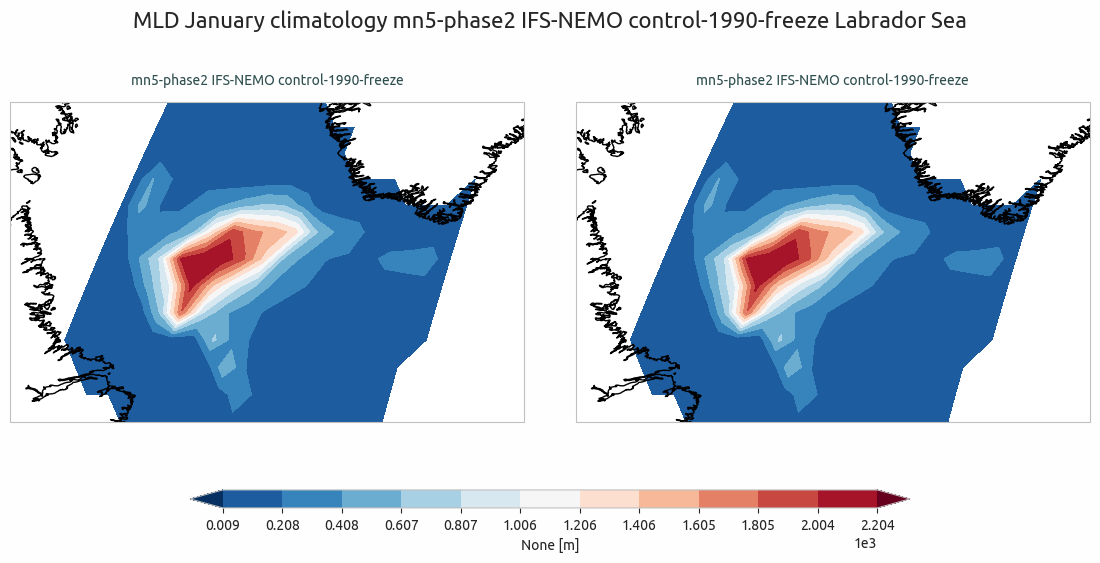

In [ ]:
ps = PlotStratification(data=strat.data[["mld"]],
                        obs=strat.data[["mld"]],
                        # clim_time="January"
                        )
ps.plot_mld() 

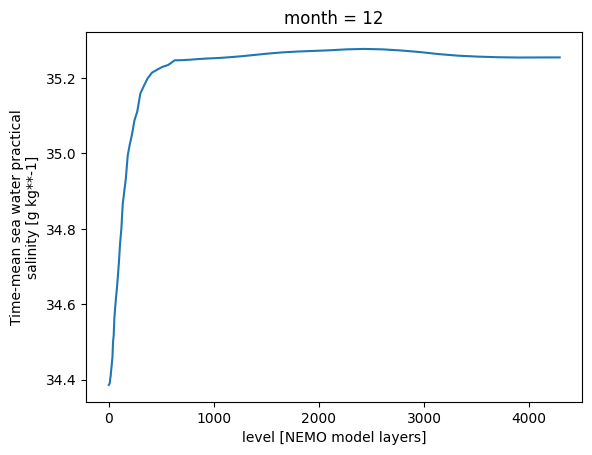

In [ ]:
strat.data.isel(month=11).so.plot()

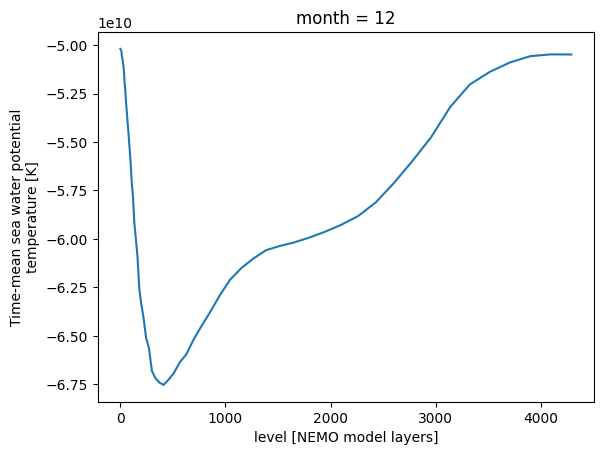

In [ ]:
strat.data.isel(month=11).rho.plot()

In [ ]:
strat.data.isel(month=11)

<xarray.Dataset> Size: 3kB
Dimensions:    (level: 75)
Coordinates:
  * level      (level) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    idx_level  (level) int64 600B dask.array<chunksize=(75,), meta=np.ndarray>
    month      int64 8B 12
Data variables:
    thetao     (level) float64 600B dask.array<chunksize=(25,), meta=np.ndarray>
    so         (level) float64 600B dask.array<chunksize=(25,), meta=np.ndarray>
    rho        (level) float64 600B dask.array<chunksize=(25,), meta=np.ndarray>
Attributes:
    history:             \n2025-07-31 18:54:19 AQUA💧: Retrieved from IFS-NEMO...
    AQUA_region:         Labrador Sea
    diagnostic:          ocean_circulation
    diagnostic_product:  stratification
    catalog:             mn5-phase2
    model:               IFS-NEMO
    exp:                 control-1990-freeze
    region:              Labrador Sea
    timestamp:           2025-07-31 18:54:20
    aqua_version:        0.17.0-alpha